In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [24]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [25]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [26]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


In [27]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000000e+00, 8.500000e+00, 7.225000e+01, 6.141250e+02],
       [1.000000e+00, 9.600000e+00, 9.216000e+01, 8.847360e+02],
       [1.000000e+00, 5.900000e+00, 3.481000e+01, 2.053790e+02],
       ...,
       [1.000000e+00, 1.120000e+01, 1.254400e+02, 1.404928e+03],
       [1.000000e+00, 1.180000e+01, 1.392400e+02, 1.643032e+03],
       [1.000000e+00, 1.180000e+01, 1.392400e+02, 1.643032e+03]])

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_y_ = regr.fit(train_x_poly, train_y)
print("Coefficient = : ", regr.coef_)
print("Intercept =: ", regr.intercept_ )

Coefficient = :  [[ 0.00000000e+00  2.87480674e+01  3.31846652e-02 -2.35779755e-02]]
Intercept =:  [-34.09229054]


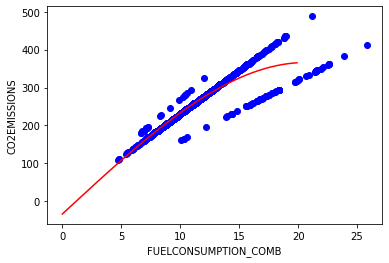

In [29]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 20.0, 0.1)
yy = regr.intercept_[0] + regr.coef_[0][1]*XX+regr.coef_[0][2]*np.power(XX, 2)+ regr.coef_[0][3]*np.power(XX,3)
plt.plot(XX, yy, '-r')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [30]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
y_hat = regr.predict(test_x_poly)

print("Mean absolute error : %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual Sum of Squares: %.2f" %np.mean(y_hat - test_y)**2)
print("R2score: %.2f" % r2_score(y_hat, test_y))

Mean absolute error : 10.67
Residual Sum of Squares: 0.46
R2score: 0.83
